목표가 설정
아래 공식을 사용하여 목표가(Target)를 계산합니다.
목표가 = 당일 시가 + (전일 변동폭 * K)
변동폭 = 전일 고가 - 전일 저가

In [431]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [432]:
kodexInverseX2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "500072")
kodex150X2 = stock.get_market_ohlcv_by_date("20000101", "20250101", "233740")
# kodex150X2 233740


In [433]:
# kodexInverseX2

In [434]:
# 변동폭 만들기

kodex150X2['변동폭'] = kodex150X2['고가'] - kodex150X2['저가']
kodexInverseX2['변동폭'] = kodexInverseX2['고가'] - kodexInverseX2['저가']
# kodex150X2.columns

In [435]:
# 전일 변동폭 만들기

kodex150X2['전일 변동폭'] = kodex150X2['변동폭'].shift(periods=1)
kodexInverseX2['전일 변동폭'] = kodexInverseX2['변동폭'].shift(periods=1)
# kodexInverseX2[['전일 변동폭']]

In [436]:
kodex150X2['목표가'] = kodex150X2['시가'] + (kodex150X2['전일 변동폭'] * 0.25)
# kodex150X2.head(10)
kodexInverseX2['목표가'] = kodexInverseX2['시가'] + (kodexInverseX2['전일 변동폭'] * 0.25)
# kodexInverseX2.head(10)


In [437]:
kodex150X2['종가'] / kodex150X2['목표가']
kodexInverseX2['종가'] / kodexInverseX2['목표가']

날짜
2022-10-17         NaN
2022-10-18    0.980623
2022-10-19    1.012089
2022-10-20    1.018553
2022-10-21    0.984578
                ...   
2024-12-20    1.036921
2024-12-23    0.980728
2024-12-24    0.988905
2024-12-26    1.022837
2024-12-27    1.012138
Length: 542, dtype: float64

<Axes: xlabel='날짜'>

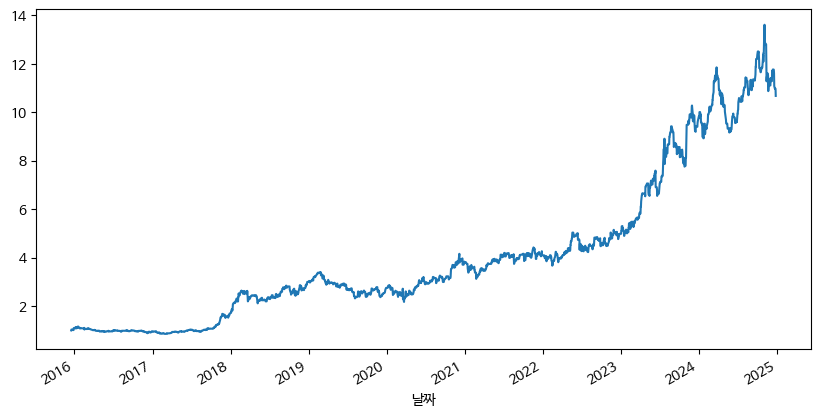

In [438]:
kodex150X2Conditions = kodex150X2['고가'] >= kodex150X2['목표가'] # 매도 조건
kodex150X2['수익률'] = np.where(kodex150X2Conditions, kodex150X2['종가'] / kodex150X2['목표가'] , 1)
kodex150X2['누적수익률'] = kodex150X2['수익률'].cumprod()

# KodexInverseX2
kodexInverseX2Conditions = kodexInverseX2['고가'] >= kodexInverseX2['목표가'] # 매도 조건
kodexInverseX2['수익률'] = np.where(kodexInverseX2Conditions, kodexInverseX2['종가'] / kodexInverseX2['목표가'] , 1)
kodexInverseX2['누적수익률'] = kodexInverseX2['수익률'].cumprod()

# kodexInverseX2['누적수익률'].plot(figsize=(10,5))
kodex150X2['누적수익률'].plot(figsize=(10,5))



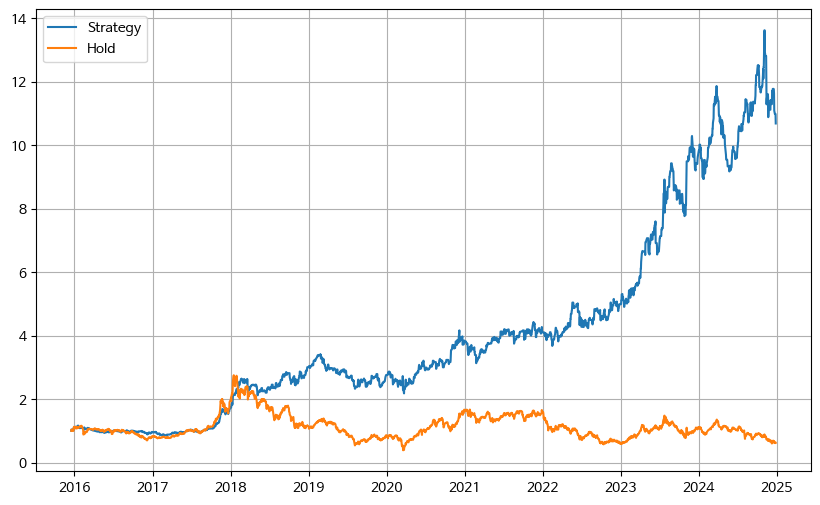

In [439]:
delta_days = kodex150X2.index[-1] - kodex150X2.index[0]
delta_days.days
year = delta_days.days / 365

cagr = (kodex150X2['누적수익률'].iloc[-1] ** (1 / year)) - 1
cagr*100


plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(kodex150X2['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(kodex150X2['종가'] / kodex150X2['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()

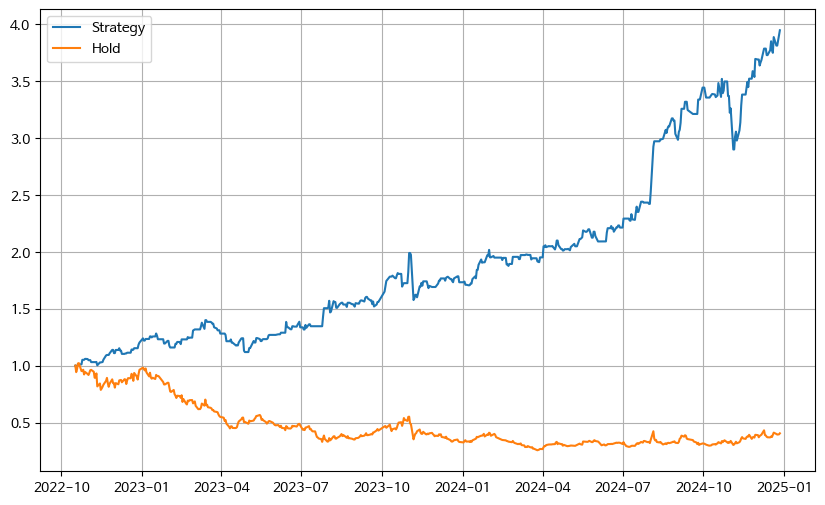

In [440]:
delta_days = kodexInverseX2.index[-1] - kodexInverseX2.index[0]
delta_days.days
year = delta_days.days / 365

cagr = (kodexInverseX2['누적수익률'].iloc[-1] ** (1 / year)) - 1
cagr*100

plt.figure(figsize=(10, 6))

# 변동성 돌파 전략
plt.plot(kodexInverseX2['누적수익률'], label='Strategy')

# 단순 보유
plt.plot(kodexInverseX2['종가'] / kodexInverseX2['종가'].iloc[0], label='Hold')


plt.grid()
plt.legend()
plt.show()

In [441]:
# K값에 따른
# 0.1 0.7 144
# 0.2 23 98 
# 0.3 33 70
# 0.4 32 45
# 0.5 28 33
# 0.6 21 13 
# 0.7 20 10
# 0.8 18 8
# 0.9 16 9